In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv')
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [6]:
df.isnull().mean()*100

TransactionID              0.0
AccountID                  0.0
TransactionAmount          0.0
TransactionDate            0.0
TransactionType            0.0
Location                   0.0
DeviceID                   0.0
IP Address                 0.0
MerchantID                 0.0
Channel                    0.0
CustomerAge                0.0
CustomerOccupation         0.0
TransactionDuration        0.0
LoginAttempts              0.0
AccountBalance             0.0
PreviousTransactionDate    0.0
dtype: float64

<Axes: >

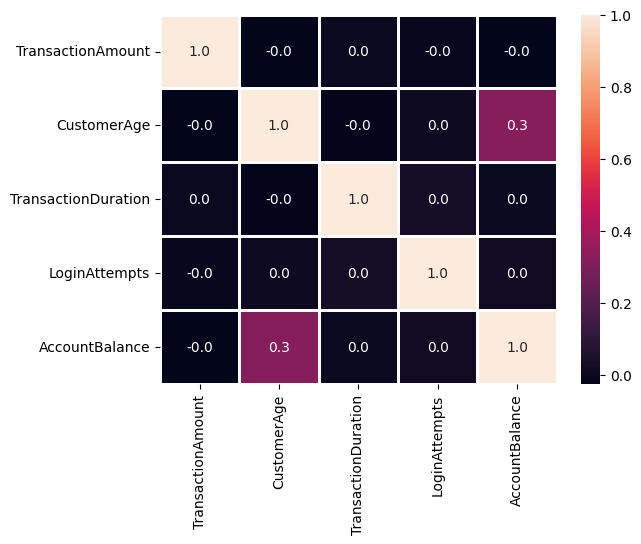

In [7]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.1f',linewidth=2,square=False)

In [8]:
categorical_columns = [var for var in df.columns if df[var].dtypes == 'object']
numerical_columns = [var for var in df.columns if df[var].dtypes != 'object']

array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'CustomerAge'}>],
       [<Axes: title={'center': 'TransactionDuration'}>,
        <Axes: title={'center': 'LoginAttempts'}>],
       [<Axes: title={'center': 'AccountBalance'}>, <Axes: >]],
      dtype=object)

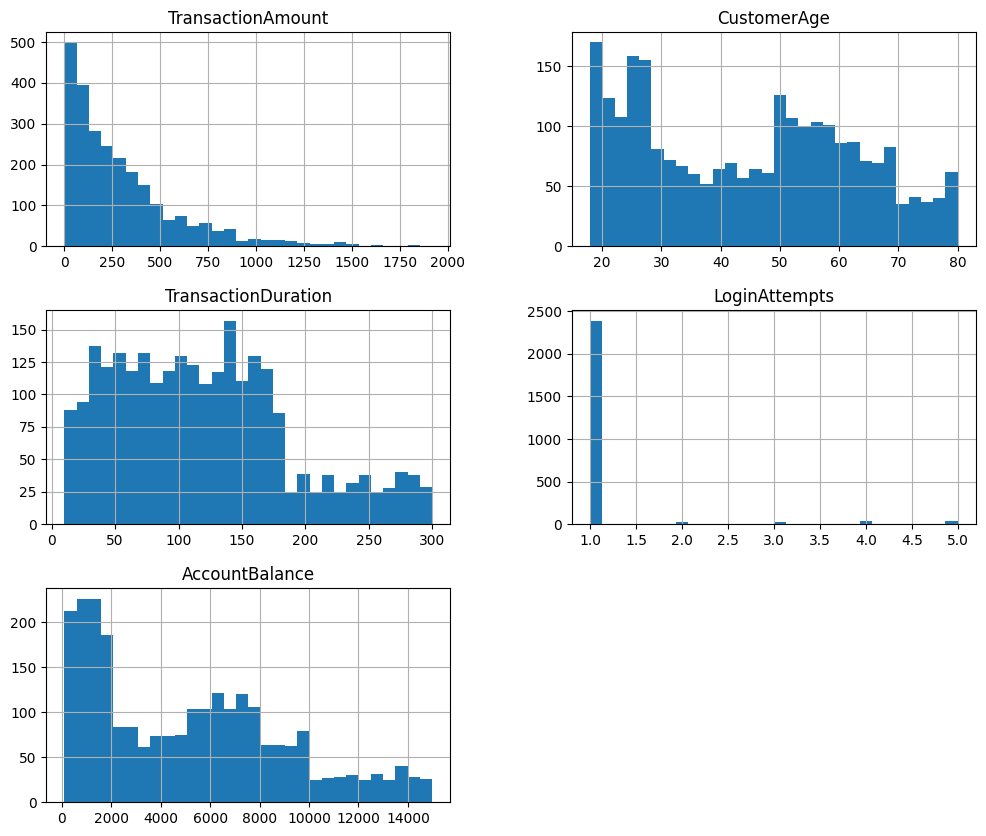

In [9]:
df[numerical_columns].hist(bins=30, figsize=(12,10))

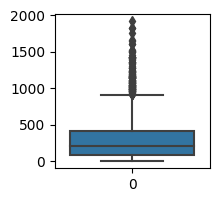

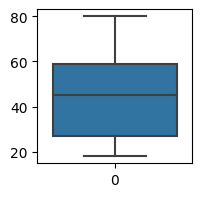

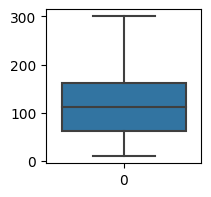

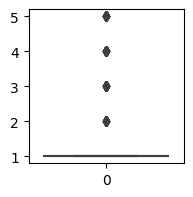

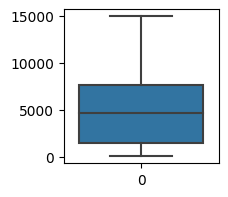

In [10]:
X = df[numerical_columns]
for columns in X:
    fig, axs = plt.subplots(figsize=(2,2))
    sns.boxplot(X[columns])

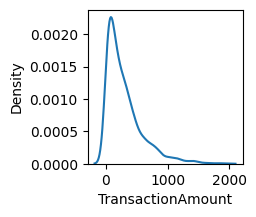

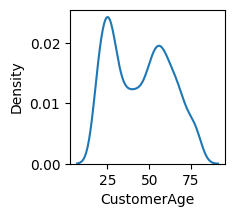

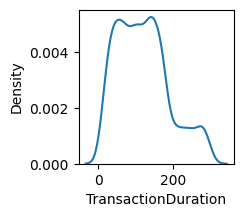

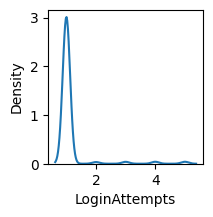

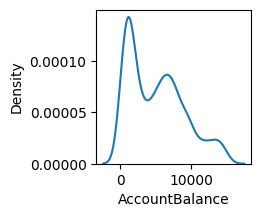

In [11]:
X = df[numerical_columns]
for columns in X:
    fig, axs = plt.subplots(figsize=(2,2))
    sns.kdeplot(X[columns])

In [12]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

EDA

In [13]:
df['CustomerOccupation'].value_counts()

CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64

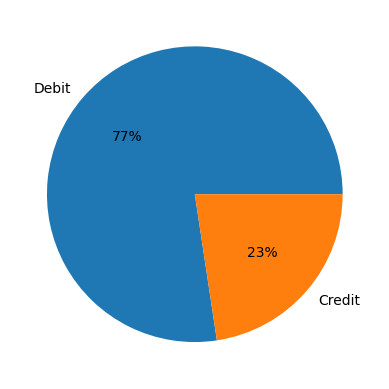

In [14]:
plt.pie(df['TransactionType'].value_counts(),labels=['Debit','Credit'],autopct='%1.f%%')
plt.show()

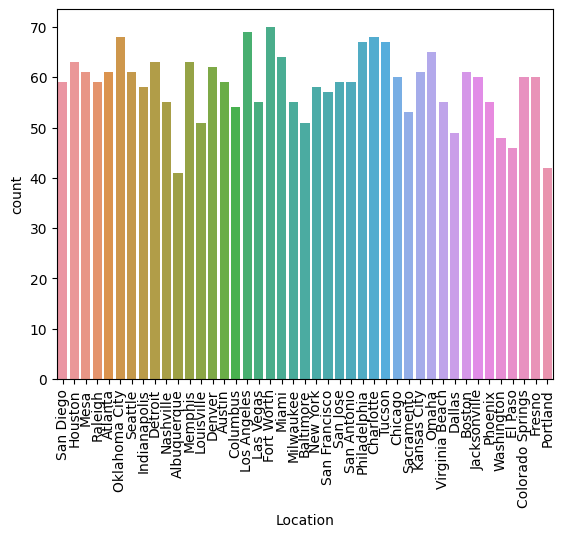

In [15]:
sns.countplot(data=df, x='Location')
plt.xticks(rotation=90)
plt.show()

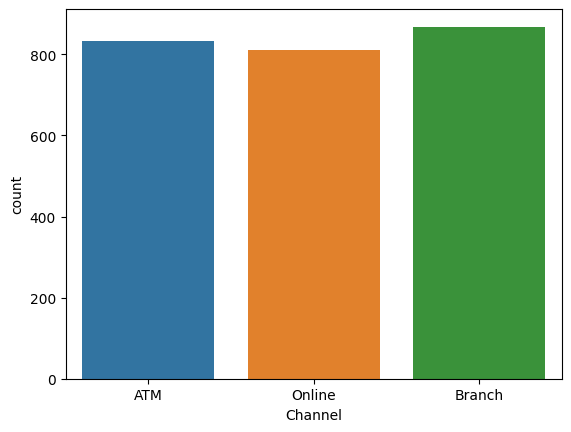

In [16]:
sns.countplot(data=df, x='Channel')
plt.show()

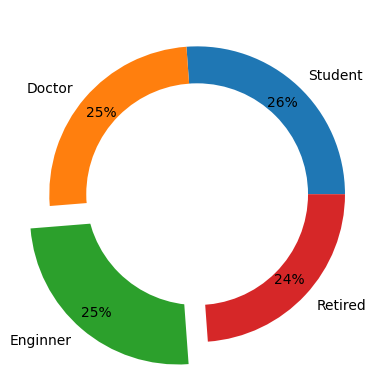

In [17]:
plt.pie(df['CustomerOccupation'].value_counts(),labels=['Student','Doctor','Enginner','Retired'],autopct='%1.f%%',pctdistance=0.85,explode=(0,0,0.2,0))
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

<Axes: xlabel='TransactionDate', ylabel='TransactionAmount'>

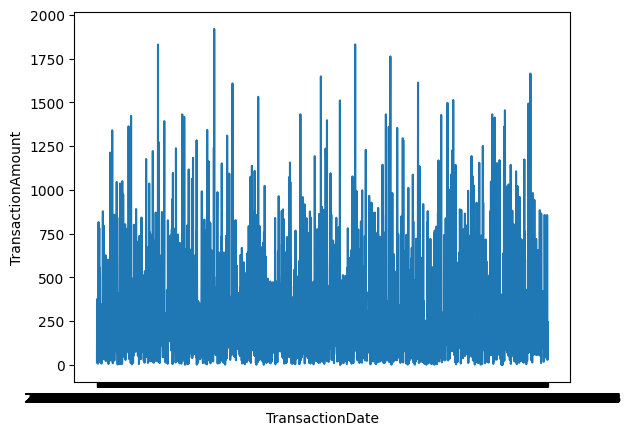

In [18]:
sns.lineplot(x=df['TransactionDate'],y=df['TransactionAmount'])

Text(0.5, 1.0, 'Transactionamount vs AccountBalance')

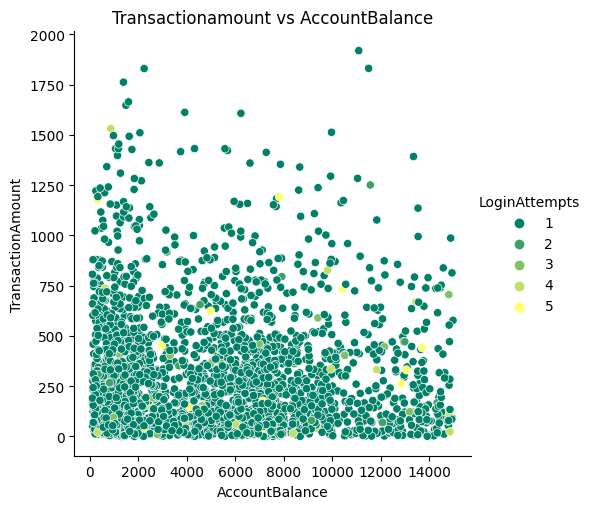

In [19]:
sns.relplot(kind='scatter',x=df['AccountBalance'],y=df['TransactionAmount'],palette='summer',hue=df['LoginAttempts'])
plt.title('Transactionamount vs AccountBalance')

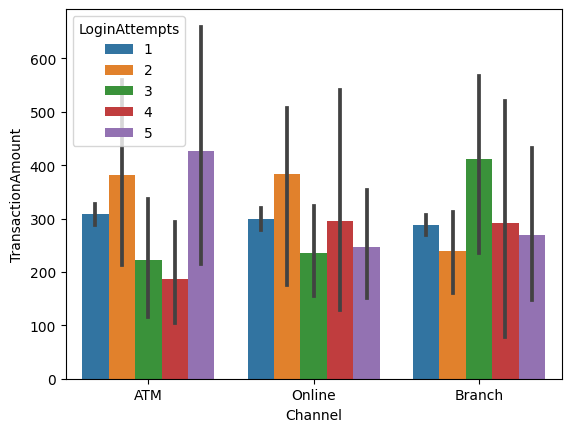

In [20]:
sns.barplot(x=df['Channel'],y=df['TransactionAmount'],hue=df['LoginAttempts'])
plt.show()

Text(0.5, 1.0, 'Transactionamount vs AccountBalance')

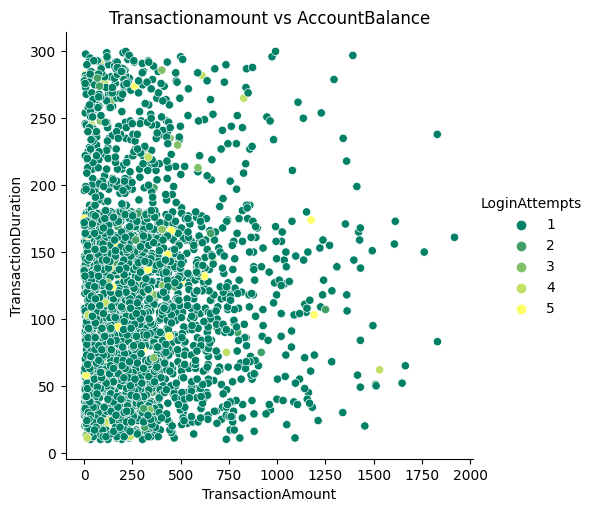

In [21]:
sns.relplot(kind='scatter',x=df['TransactionAmount'],y=df['TransactionDuration'],palette='summer',hue=df['LoginAttempts'])
plt.title('Transactionamount vs AccountBalance')

<Axes: ylabel='Count'>

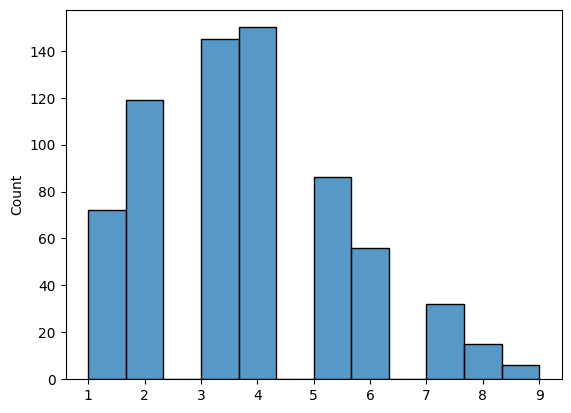

In [22]:
sns.histplot((df.groupby(['DeviceID'])['IP Address'].nunique().values))

<Axes: ylabel='Count'>

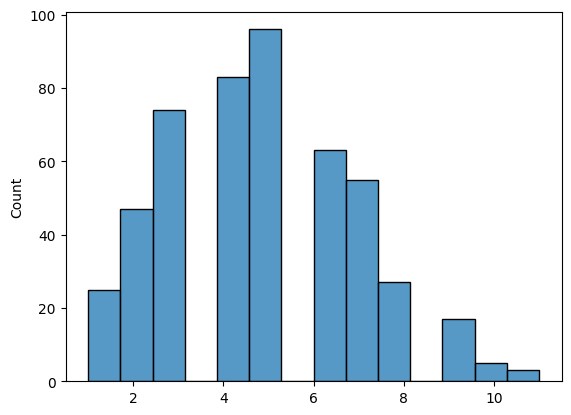

In [23]:
sns.histplot(df.groupby(['AccountID'])['Location'].nunique().values)

Daily , Monthly Transactions , Hourly Transaction

In [24]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [25]:
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

In [26]:
daily_transactions = df.groupby(df['TransactionDate'].dt.date)['TransactionID'].count()
print(daily_transactions)

monthly_transactions = df.groupby(df['TransactionDate'].dt.to_period('M'))['TransactionID'].count()
print(monthly_transactions)

transaction_per_hour = df.groupby(df['TransactionDate'].dt.hour)['TransactionID'].count()
print(transaction_per_hour)


TransactionDate
2023-01-02    19
2023-01-03     9
2023-01-04     4
2023-01-05     8
2023-01-06     7
              ..
2023-12-26     5
2023-12-27     4
2023-12-28     7
2023-12-29     9
2024-01-01    13
Name: TransactionID, Length: 261, dtype: int64
TransactionDate
2023-01    207
2023-02    218
2023-03    197
2023-04    161
2023-05    220
2023-06    212
2023-07    195
2023-08    224
2023-09    214
2023-10    226
2023-11    221
2023-12    204
2024-01     13
Freq: M, Name: TransactionID, dtype: int64
TransactionDate
16    1316
17     819
18     377
Name: TransactionID, dtype: int64


In [27]:
df['Day_Of_Week'] = df['TransactionDate'].dt.day_name()
transaction_per_day = df['Day_Of_Week'].value_counts()
transaction_per_day

Day_Of_Week
Monday       1070
Friday        373
Thursday      368
Tuesday       360
Wednesday     341
Name: count, dtype: int64

In [28]:
df['TransactionHours'] = df['TransactionDate'].dt.hour

In [29]:
df['TimeElapsed'] = df.groupby(['AccountID'])['TransactionDate'].diff().dt.total_seconds().fillna(0) / 60

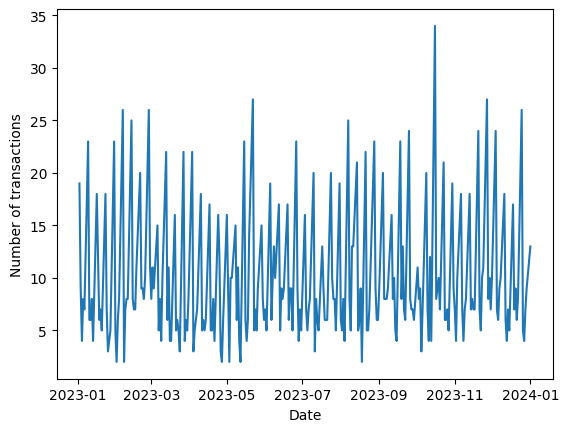

In [30]:
daily_transactions.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of transactions')
plt.show()

Detect Fraud

**Z Score w.r.t each Account ID**

In [31]:
mean = df.groupby(['AccountID'])['TransactionAmount'].transform('mean')
std = df.groupby('AccountID')['TransactionAmount'].transform('std')
df['Z-Score'] = (df['TransactionAmount'] - mean ) / (std + 1e-6)

Does a User uses a new Location, Device, IP Address and Merchant in Transaction

In [32]:
df['IsNewLocation'] = (df['Location'] != df.groupby(['AccountID'])['Location'].transform('first')).astype(int)
df['IsNewDevice'] = (df['DeviceID'] != df.groupby(['AccountID'])['DeviceID'].transform('first')).astype(int)
df['IsNewMerchant'] = (df['MerchantID'] != df.groupby(['AccountID'])['MerchantID'].transform('first')).astype(int)

TransactionAmount and BalanceRatio

In [33]:
df['AmountBalanceRatio'] = df['TransactionAmount'] / (df['AccountBalance'] + 1e-6)

High Login attempts

In [34]:
df['HighLoginAttempts'] = (df['LoginAttempts'] > 3).astype(int)

Risk Score

In [35]:
Risk_Score = {
    'Student' : 0,
    'Engineer' : 1,
    'Doctor' : 2,
    'Retired' : 3
}

In [36]:
df['RiskScore'] = df['CustomerOccupation'].map(Risk_Score)
df['TransactionType'] = df['TransactionType'].map({'Credit':0,'Debit':1})

Drop Irrelevent Columns

In [37]:
df = df.drop(columns = ['TransactionID','AccountID','Location','DeviceID','IP Address','CustomerOccupation','MerchantID','TransactionDate','PreviousTransactionDate','Day_Of_Week'])

In [38]:
df

,TransactionAmount,TransactionType,Channel,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHours,TimeElapsed,Z-Score,IsNewLocation,IsNewDevice,IsNewMerchant,AmountBalanceRatio,HighLoginAttempts,RiskScore
0,14.09,1,ATM,70,81,1,5112.21,16,0.000000,-0.915239,0,0,0,0.002756,0,2
1,376.24,1,ATM,68,141,1,13758.91,16,0.000000,0.298035,0,0,0,0.027345,0,2
2,126.29,1,Online,19,56,1,1122.35,18,0.000000,-0.560249,0,0,0,0.112523,0,0
3,184.50,1,Online,26,25,1,8569.06,16,0.000000,-0.188923,0,0,0,0.021531,0,0
4,13.45,0,Online,26,198,1,7429.40,17,0.000000,-0.860385,0,0,0,0.001810,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,0,Branch,33,109,1,12690.79,17,33162.200000,2.174847,1,1,1,0.067467,0,2
2508,251.54,1,Branch,48,177,1,254.75,17,17277.833333,-0.313812,1,1,1,0.987399,0,2
2509,28.63,1,Branch,56,146,1,3382.91,17,286622.833333,-0.733694,1,1,1,0.008463,0,3
2510,185.97,1,Online,23,19,1,1776.91,16,-64828.083333,-0.475602,1,1,1,0.104659,0,0


In [39]:
df.isnull().mean()*100

TransactionAmount      0.000000
TransactionType        0.000000
Channel                0.000000
CustomerAge            0.000000
TransactionDuration    0.000000
LoginAttempts          0.000000
AccountBalance         0.000000
TransactionHours       0.000000
TimeElapsed            0.000000
Z-Score                0.955414
IsNewLocation          0.000000
IsNewDevice            0.000000
IsNewMerchant          0.000000
AmountBalanceRatio     0.000000
HighLoginAttempts      0.000000
RiskScore              0.000000
dtype: float64

In [40]:
df['Z-Score'] = df['Z-Score'].fillna(0)

ANOMALY DETECTION USING K-MEANS

In [41]:
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [42]:
ohe = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
arr = ohe.fit_transform(df[['Channel']])
new_df = pd.DataFrame(arr, columns = ohe.get_feature_names_out())
bank = pd.concat((df, new_df), axis=1)

In [43]:
bank.drop('Channel',axis=1,inplace=True)

In [44]:
pipe = Pipeline([
    ('scaler', StandardScaler())
])

In [45]:
scaled = pipe.fit_transform(bank)

ELBOW METHOD

<Axes: >

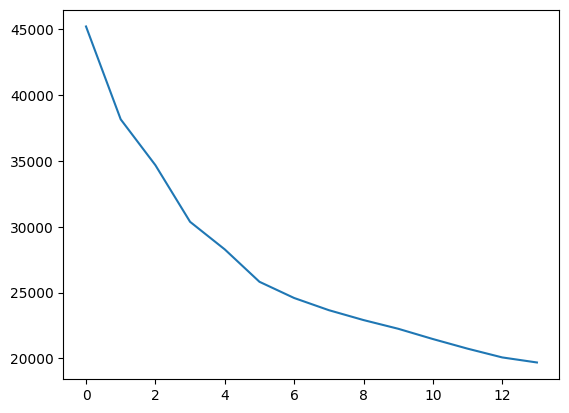

In [46]:
from sklearn.cluster import KMeans
l = []
for i in range(1,15):
    km = KMeans(n_clusters = i)
    km.fit_predict(scaled)
    l.append(km.inertia_)
sns.lineplot(l)

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
arr = pca.fit_transform(scaled)
pca_df = pd.DataFrame(arr, columns = ['PCA1','PCA2'])

In [48]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KMeans(n_clusters=6))
])

In [49]:
labels = pipe2.fit_predict(scaled)
pca_df['kmean_labels'] = labels

In [50]:
model = pipe2.named_steps['model']

In [51]:
model

KMeans(n_clusters=6)

In [52]:
centers = model.fit_transform(scaled)
min_dict = np.min(centers, axis=1)
threshold = np.percentile(min_dict, 97)
pca_df['DistanceFromClosetCluster'] = min_dict
pca_df['IsAnomaly'] = (pca_df['DistanceFromClosetCluster'] > threshold).astype(int)

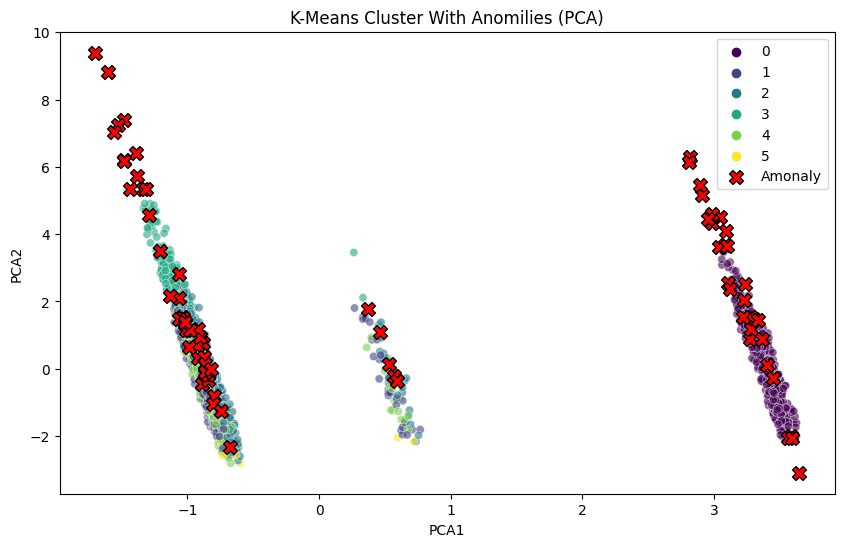

total anomilies detected: 76


In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PCA1',y='PCA2',
    hue='kmean_labels',
    data = pca_df,
    palette='viridis',
    alpha=0.6
)

#Overlay Anomalies
anomilies = pca_df[pca_df['IsAnomaly'] == 1]
plt.scatter(
    anomilies['PCA1'],anomilies['PCA2'],
    marker='X', s=100, c='red', edgecolor = 'black',
    label = 'Amonaly'
    
)

plt.title('K-Means Cluster With Anomilies (PCA)')
plt.legend()
plt.show()
print('total anomilies detected:', len(anomilies))

ANOMALY DETECTION USING ISOLATION FOREST

In [54]:
from sklearn.ensemble import IsolationForest

forest_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', IsolationForest(contamination=0.03))
])

In [55]:
forest_pred = forest_pipe.fit_predict(bank)

In [56]:
forest_pred

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
iso_pca = PCA(n_components=2)
arr2 = iso_pca.fit_transform(scaled)
forest_pcadf = pd.DataFrame(arr2, columns=['PCA1','PCA2'])
forest_pcadf['forest_preds'] = forest_pred
forest_pcadf['forest_preds'] = forest_pcadf['forest_preds'].map({1:'Normal',-1:'Fraud'})

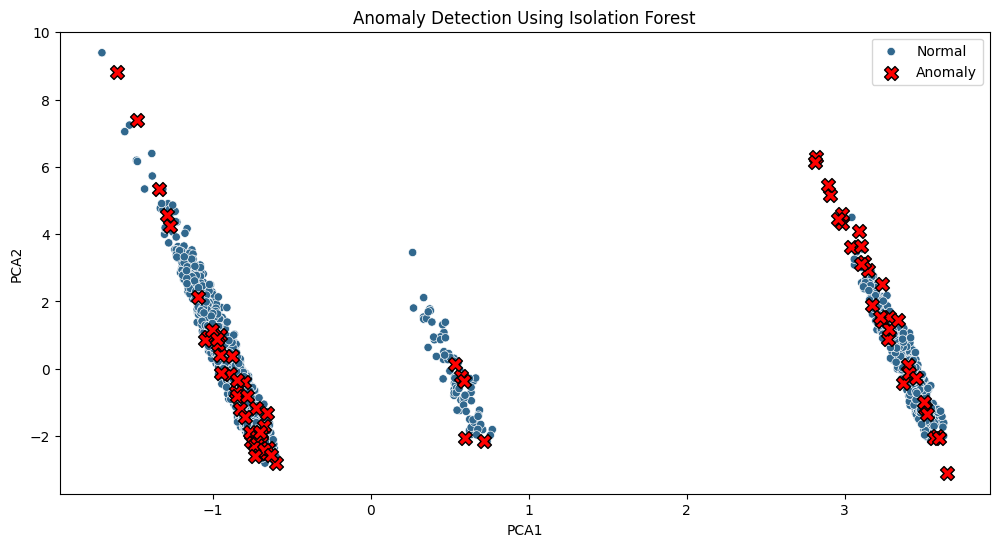

Total fraud Detection:  76


In [58]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = forest_pcadf, x='PCA1',y='PCA2', hue='forest_preds',legend=False,palette='viridis',label='Normal')
anomilies = forest_pcadf[forest_pcadf['forest_preds'] == 'Fraud']
plt.scatter(
    anomilies['PCA1'], anomilies['PCA2'],
    marker = 'X', s=100, c='red', edgecolor = 'black', label = 'Anomaly'
)
plt.legend()
plt.title('Anomaly Detection Using Isolation Forest')
plt.show()
print('Total fraud Detection: ', len(forest_pcadf[forest_pcadf['forest_preds'] == 'Fraud']))

ANOMALY DETECTION USING DBSCAN

In [59]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

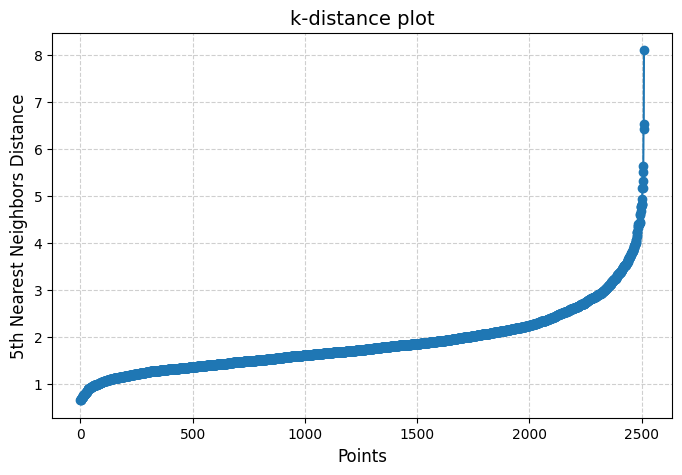

In [60]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled)
distances, indices = nbrs.kneighbors(scaled)

# Sort the 5th Nearest Neighbors distances
sorted_distances = np.sort(distances[:,4], axis=0)

plt.figure(figsize=(8,5))
plt.plot(sorted_distances
        , marker = 'o', linestyle='-')
plt.title('k-distance plot', fontsize=14)
plt.xlabel('Points',fontsize=12)
plt.ylabel('5th Nearest Neighbors Distance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [61]:
db = DBSCAN(eps =3)
dbscan_preds = db.fit_predict(scaled)

In [62]:
dbpca = PCA(n_components=2)
arr3 = dbpca.fit_transform(scaled)
dbscan_pcadf = pd.DataFrame(arr3, columns=['PCA1','PCA2'])
dbscan_pcadf['db_preds'] = dbscan_preds
dbscan_pcadf['db_preds'] = np.where(dbscan_pcadf['db_preds'] == -1, 'Fraud','Normal')

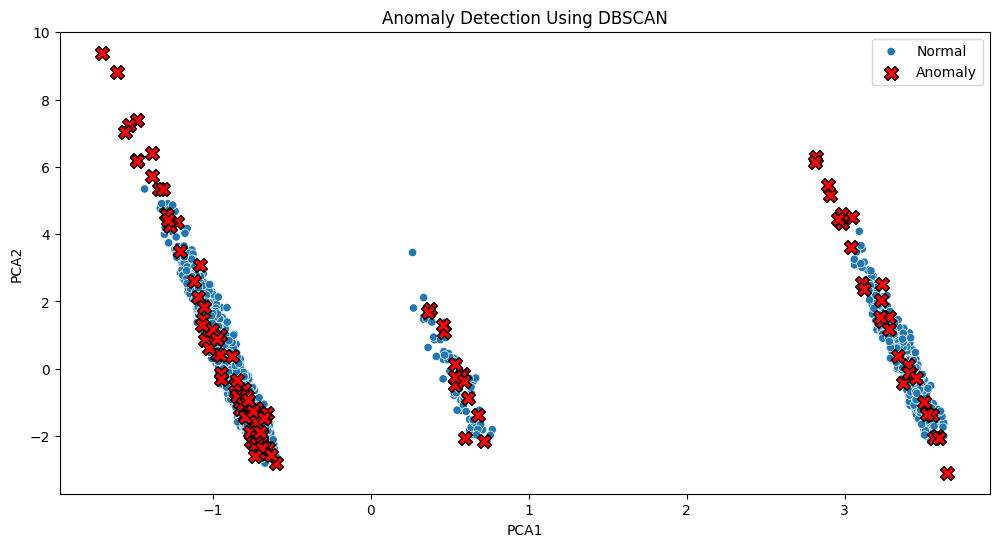

Total fraud Detection: 0


In [63]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = dbscan_pcadf, x='PCA1',y='PCA2',hue='db_preds',legend=False, label='Normal')
anomalies = dbscan_pcadf[dbscan_pcadf['db_preds'] == 'Fraud']

plt.scatter(
    anomalies['PCA1'],anomalies['PCA2'],
    marker = 'X', s=100, c='red', edgecolor='black',label='Anomaly'
)
plt.legend()
plt.title('Anomaly Detection Using DBSCAN')
plt.show()
print('Total fraud Detection:',len(dbscan_pcadf[dbscan_pcadf['db_preds']=='Fruad']))

ANOMALY DETECTION USING LOCAL OUTLIER FACTOR(LOF)

In [64]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=6)
lof_labels = lof.fit_predict(scaled)

In [65]:
arr3

array([[ 3.47113965, -1.33689068],
       [ 3.52400301, -1.22191122],
       [ 3.24258997,  1.53978528],
       ...,
       [-0.78290214, -1.66725171],
       [-0.97963347,  1.10607871],
       [-1.11456079,  3.04436067]])

In [66]:
lof_pca = PCA(n_components=2)
arr4 = lof_pca.fit_transform(scaled)
lof_pcadf = pd.DataFrame(arr4, columns=['PC1','PC2'])
lof_pcadf['lof_labels'] = lof_labels
lof_pcadf['lof_labels'] = np.where(lof_pcadf['lof_labels'] == -1, 'Fraud','Normal')

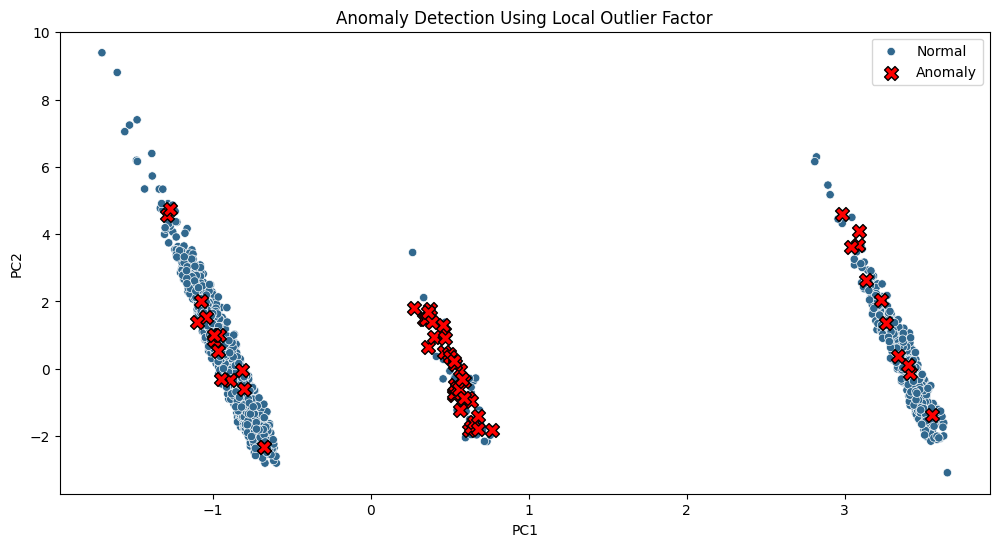

Total Anomalies Detected: 61


In [67]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = lof_pcadf, x='PC1',y='PC2',hue='lof_labels',palette='viridis',legend=False,label='Normal')
anomalies = lof_pcadf[lof_pcadf['lof_labels'] == 'Fraud']

plt.scatter(
    anomalies['PC1'],anomalies['PC2'],
    marker = 'X',s=100, c='red', edgecolor='black',label='Anomaly'
)
plt.legend()
plt.title('Anomaly Detection Using Local Outlier Factor')
plt.show()
print('Total Anomalies Detected:',len(lof_pcadf[lof_pcadf['lof_labels']=='Fraud']))